# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | bethalto
Processing Record 4 of Set 1 | revda
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | dingli
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 15 of Set 1 | jamsa
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bereda
Processing Record 18 of Set 1 | tromso
Processing Record 19 of Set 1 | camocim
Processing Record 20 of Set 1 | bredasdorp
Processing Reco

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.95,84,100,25.75,PF,1678226997
1,bethalto,38.9092,-90.0407,53.22,63,53,4.00,US,1678226997
2,revda,56.8010,59.9303,18.68,93,98,10.40,RU,1678226998
3,albany,42.6001,-73.9662,31.17,58,95,8.01,US,1678226934
4,upernavik,72.7868,-56.1549,7.39,93,71,5.39,GL,1678226998


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.95,84,100,25.75,PF,1678226997
1,bethalto,38.9092,-90.0407,53.22,63,53,4.00,US,1678226997
2,revda,56.8010,59.9303,18.68,93,98,10.40,RU,1678226998
3,albany,42.6001,-73.9662,31.17,58,95,8.01,US,1678226934
4,upernavik,72.7868,-56.1549,7.39,93,71,5.39,GL,1678226998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

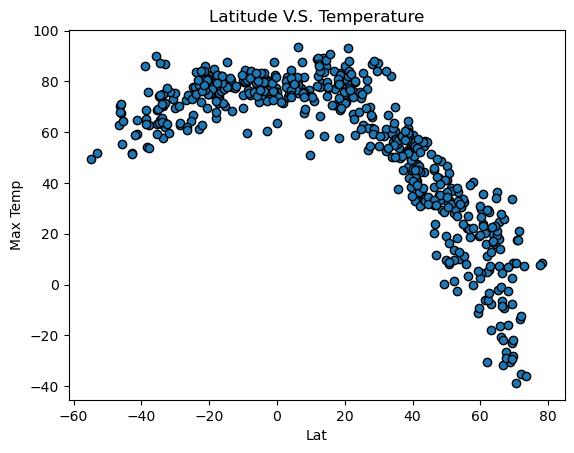

<Figure size 640x480 with 0 Axes>

In [160]:
# Build scatter plot for latitude vs. temperature
""" lat_temp_df = city_data_df.loc["Lat”][“Max Temp”].count()
lat_temp_df.plt(scatter)                  
splot = scatter_df.plot(kind="scatter")
 """
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", marker="o", )


# Incorporate the other graph properties
plt.title("Latitude V.S. Temperature")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

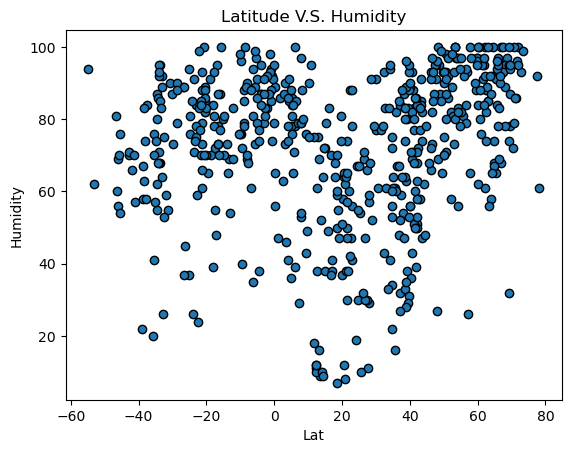

<Figure size 640x480 with 0 Axes>

In [161]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", marker="o", )



# Incorporate the other graph properties
plt.title("Latitude V.S. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.show()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

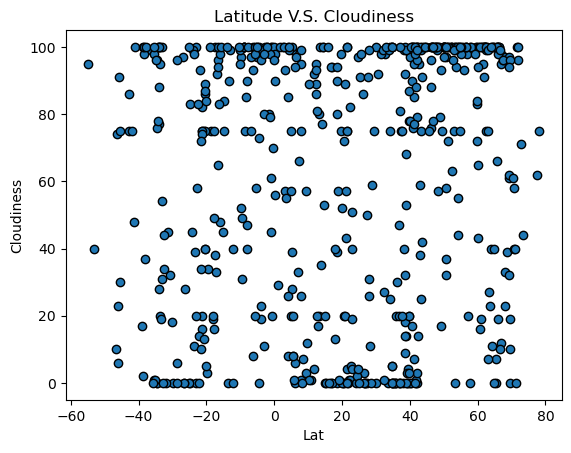

<Figure size 640x480 with 0 Axes>

In [162]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", marker="o", )



# Incorporate the other graph properties
plt.title("Latitude V.S. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

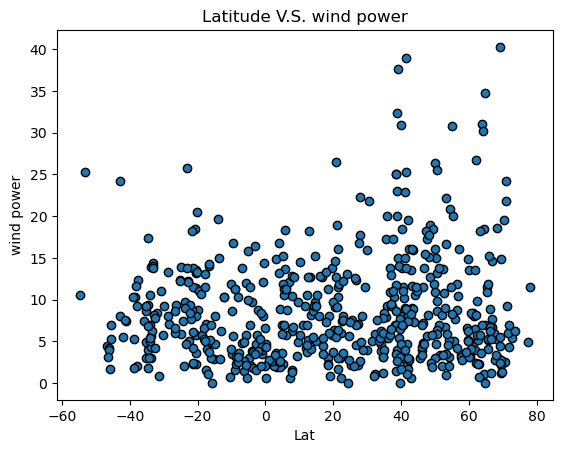

<Figure size 640x480 with 0 Axes>

In [163]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", marker="o", )


# Incorporate the other graph properties
plt.title("Latitude V.S. wind power")
plt.xlabel("Lat")
plt.ylabel("wind power")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [164]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [165]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethalto,38.9092,-90.0407,53.22,63,53,4.00,US,1678226997
2,revda,56.8010,59.9303,18.68,93,98,10.40,RU,1678226998
3,albany,42.6001,-73.9662,31.17,58,95,8.01,US,1678226934
4,upernavik,72.7868,-56.1549,7.39,93,71,5.39,GL,1678226998
6,dingli,35.8614,14.3822,53.82,82,20,9.22,MT,1678226999


In [166]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.95,84,100,25.75,PF,1678226997
5,bluff,-46.6000,168.3333,62.69,81,10,4.43,NZ,1678226999
7,port alfred,-33.5906,26.8910,70.18,95,100,3.00,ZA,1678227000
9,mataura,-46.1927,168.8643,70.50,56,23,4.16,NZ,1678227001
11,ushuaia,-54.8000,-68.3000,49.62,94,95,10.56,AR,1678227001


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8919195681391332
The r-value squared is: 0.7955205160294979


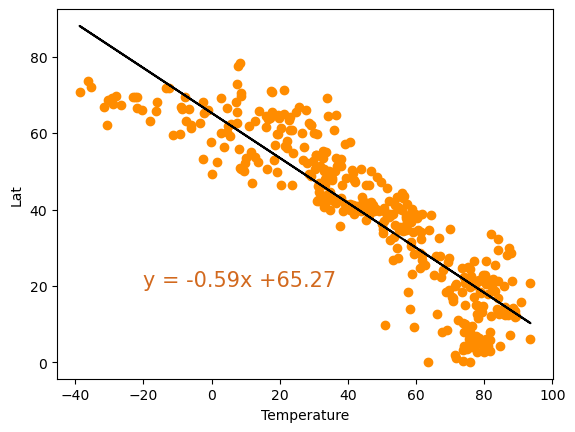

In [167]:
# Linear regression on Northern Hemisphere
x_series = northern_hemi_df["Max Temp"]
y_series = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel('Temperature')
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()


The r-value is: 0.5777623616256745
The r-value squared is: 0.3338093465112767


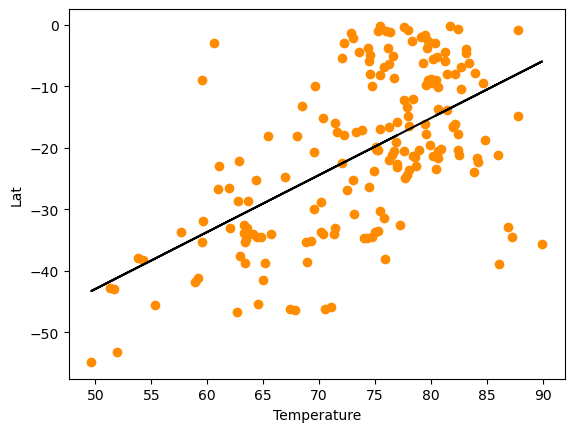

In [168]:
# Linear regression on Sourthern Hemisphere
x_series = southern_hemi_df["Max Temp"]
y_series = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel('Temperature')
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44070895664562915
The r-value squared is: 0.19422438446767903


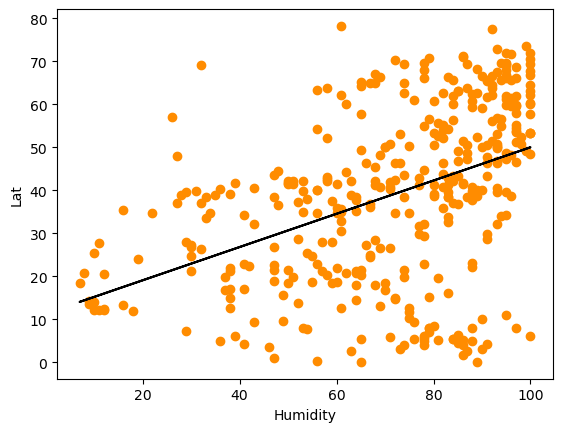

In [169]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_series = northern_hemi_df["Humidity"]
y_series = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Humidity")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

The r-value is: 0.30279106676937717
The r-value squared is: 0.09168243011533743


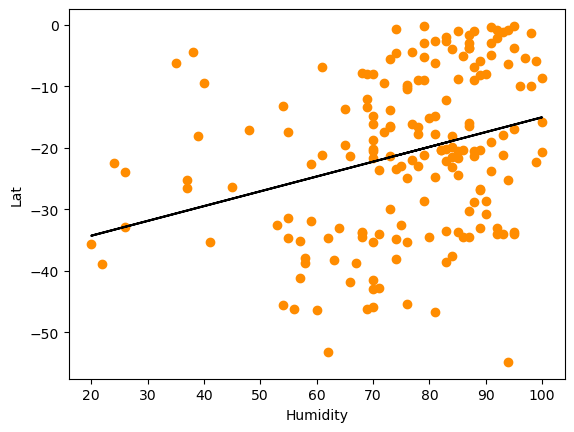

In [170]:
# Southern Hemisphere
x_series = southern_hemi_df["Humidity"]
y_series = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Humidity")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23247607363409925
The r-value squared is: 0.054045124812327136


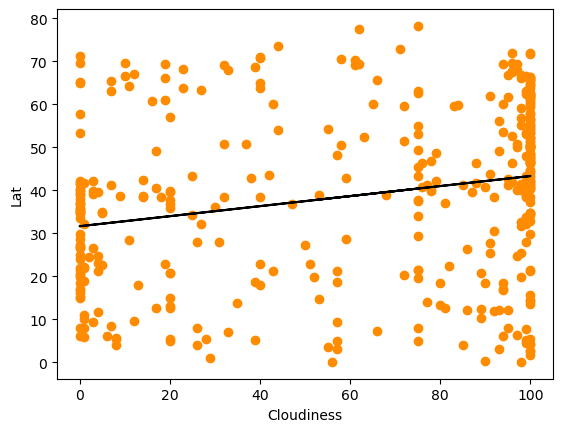

In [171]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_series = northern_hemi_df["Cloudiness"]
y_series = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Cloudiness")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

The r-value is: 0.21430913072251556
The r-value squared is: 0.045928403511040265


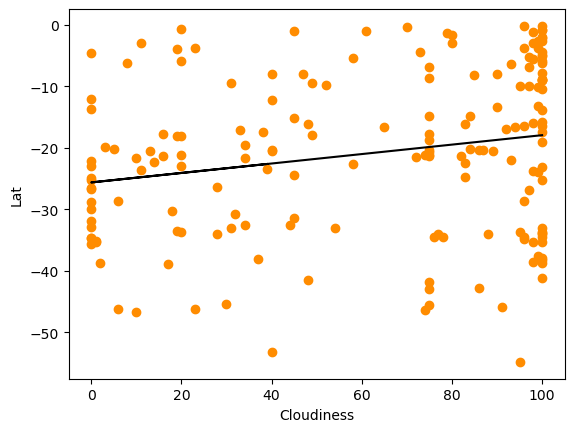

In [172]:
# Southern Hemisphere
x_series = southern_hemi_df["Cloudiness"]
y_series = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Cloudiness")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08178663411057278
The r-value squared is: 0.006689053519136708


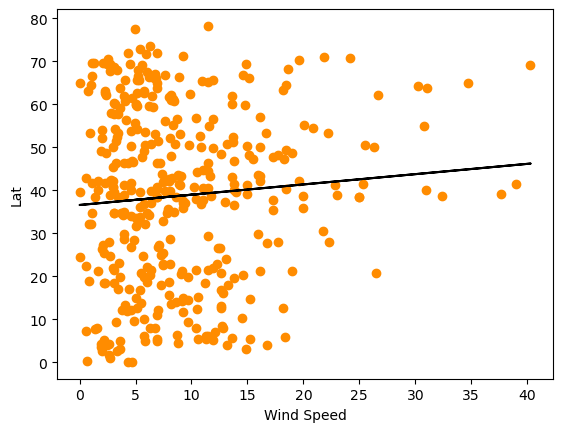

In [173]:
# Northern Hemisphere
x_series = northern_hemi_df["Wind Speed"]
y_series = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Wind Speed")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

The r-value is: -0.1423730974426261
The r-value squared is: 0.020270098875407507


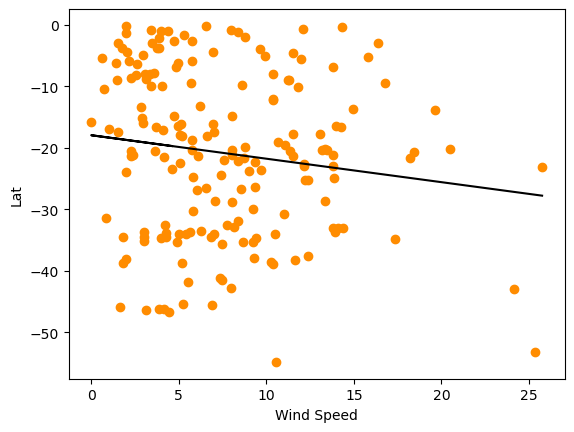

In [174]:
# Southern Hemisphere
x_series = southern_hemi_df["Wind Speed"]
y_series = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
plt.scatter(x_series,y_series, c = "darkorange")
plt.plot(x_series,regress_values,"k-")
# Label plot and annotate the line equation
plt.xlabel("Wind Speed")
plt.ylabel('Lat')
plt.annotate(line_eq,(-20,20),fontsize=15,color="chocolate")
# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r-value squared is: {rvalue**2}")

# Save the figure
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE